In [1]:
import warnings
warnings.simplefilter('ignore')

import sys
sys.path.append("..")

In [2]:
from scripts.src.hierarchy import *
from scripts.src.label_utils import *
from scripts.src.processing import *
from scripts.src.data_reading import *

logging.basicConfig(level=logging.INFO )

INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


In [3]:
o = OmniscienceReader("../OmniScience/original/ArXiv_BMED_Evise_title_abstract_os.2018-07-11.tsv")

100%|███████████████████████████████████████████████████████████████████████| 850491/850491 [00:11<00:00, 76281.62it/s]


In [4]:
y = o.gen_doc2vec("./../OmniScience/Fasttext/")

INFO:root:Loading exisiting model... 


In [6]:
y.sample(n=3)

,abstract,file_id,omniscience_label_ids,omniscience_labels,title,used_as,doc_id,category,vec
480404,Organic-inorganic perovskite solar cells have ...,ArXiv:1610.00755v1,[186201441],[materials_science],Impact of Grain Boundaries on Efficiency and S...,validation,480404,ArXiv,"[-0.21328521, -0.34086028, -0.05301662, -0.204..."
545154,The industrial manufacturing of the long-lengt...,ArXiv:1411.4720v2,[210636350],[superconductivity],High critical current density in textured Ba-1...,unused,545154,ArXiv,"[-0.56964934, -0.5384664, -0.16504288, -0.3044..."
376423,In this paper we consider the issue of paradig...,ArXiv:1506.09143v2,[342949589],[quantum_cosmology],Bayesian evidence and predictivity of the infl...,validation,376423,ArXiv,"[0.010328584, -0.4062998, 0.101423435, -0.3618..."


In [21]:
y["abstract"][0]

'The fixed point that governs the critical behavior of magnets described by the $N$-vector chiral model under the physical values of $N$ ($N =2, 3$) is shown to be a stable focus both in two and three dimensions. Robust evidence in favor of this conclusion is obtained within the five-loop and six-loop renormalization-group analysis in fixed dimension. The spiral-like approach of the chiral fixed point results in unusual crossover and near-critical regimes that may imitate varying critical exponents seen in physical and computer experiments.'

In [7]:
grouped = y.groupby("used_as")

In [13]:
grouped.groups.keys()

dict_keys(['training', 'unused', 'validation'])

In [15]:
tr = grouped.get_group("training")
va = grouped.get_group("validation")

In [17]:
tr.to_csv("../OmniScience/oms_training_ft.tsv", sep="\t")

In [ ]:
va.to_csv("../OmniScience/oms_validation_ft.tsv", sep="\t")

In [10]:
hier = HierarchyUtils("../OmniScience/original/os_tree_cat_hier.txt", True, False)

143052it [00:00, 197060.20it/s]


In [11]:
from collections import defaultdict

In [12]:
mapper = defaultdict(set)

In [13]:
for ix in tqdm(y.index):
    for labelid in y.at[ix, "omniscience_label_ids"]:
        mapper[labelid].add(y.at[ix, "doc_id"])

100%|███████████████████████████████████████████████████████████████████████| 850491/850491 [00:18<00:00, 46844.05it/s]


In [14]:
len(hier.N_all_nodes)

55258

In [17]:
len(mapper)

1023

In [18]:
rev_df = pd.DataFrame(columns=["label_id", "doc_id_list"])

In [19]:
rev_df["label_id"] = list(mapper.keys())

In [20]:
rev_df["doc_id_list"] = list(mapper.values())

In [27]:
rev_df.sample(5)

,label_id,doc_id_list
69,360769451,"{704512, 704514, 704516, 704517, 704518, 70451..."
311,249671933,"{786437, 786471, 786484, 786489, 786490, 78650..."
684,253689096,"{763872, 766176, 761606, 765671, 728840, 72960..."
799,210639271,"{765672, 846376, 720090, 720091, 720092, 72009..."
273,257942088,"{720902, 823308, 823309, 823310, 782351, 82331..."


In [22]:
tr

,abstract,file_id,omniscience_label_ids,omniscience_labels,title,used_as,doc_id,category,vec
7,"An efficient, low-complexity, soft-output dete...",ArXiv:0602079v3,[191884351],[information_theory],SISO APP Searches in Lattices with Tanner Graphs,training,7,ArXiv,"[-0.1325255, -0.6205106, 0.17325227, -0.167991..."
10,Article presents the compatibility matrix meth...,ArXiv:0703146v4,[189720911],[discrete_mathematics],A Polynomial Time Algorithm for SAT,training,10,ArXiv,"[-0.20850252, -0.3184677, 0.20332094, -0.12568..."
12,We show how to test whether a graph with n ver...,ArXiv:0705.1025v2,[190195160],[algorithms],Recognizing Partial Cubes in Quadratic Time,training,12,ArXiv,"[-0.3161865, -0.3877299, 0.16452947, -0.057102..."
13,Setcover greedy algorithm is a natural approxi...,ArXiv:0705.1750v6,[190195160],[algorithms],A Tighter Analysis of Setcover Greedy Algorith...,training,13,ArXiv,"[-0.0036494113, -0.5132326, 0.14381547, -0.313..."
15,We present approximation algorithms for almost...,ArXiv:0711.2157v3,[190195160],[algorithms],On Approximating Multi-Criteria TSP,training,15,ArXiv,"[-0.31206903, -0.39632636, -0.18978478, -0.336..."
16,We give an approximation algorithm for packing...,ArXiv:0801.1987v2,[190195160],[algorithms],A Nearly Linear-Time PTAS for Explicit Fractio...,training,16,ArXiv,"[-0.16988763, -0.5463346, 0.096373655, -0.0357..."
17,The Road Coloring Theorem states that every ap...,ArXiv:0803.0726v9,[189720911],[discrete_mathematics],A quadratic algorithm for road coloring,training,17,ArXiv,"[0.29394737, -0.19739892, 0.065221675, -0.1688..."
18,We study the minimum backlog problem (MBP). Th...,ArXiv:0804.4819v2,[190195160],[algorithms],The Minimum Backlog Problem,training,18,ArXiv,"[-0.17200682, -0.37689573, -0.2815455, 0.01238..."
20,The celebrated multi-armed bandit problem in d...,ArXiv:0805.2630v2,[190195160],[algorithms],Sequential Design of Experiments via Linear Pr...,training,20,ArXiv,"[-0.024149314, -0.35012048, 0.071046695, -0.31..."
21,In this paper we present an algorithmic framew...,ArXiv:0806.0840v2,[189720911],[discrete_mathematics],A Dynamic Programming Framework for Combinator...,training,21,ArXiv,"[-0.19697386, -0.25142038, 0.58974314, -0.4167..."


100%|██████████████████████████████████████████████████████████████████████| 850491/850491 [00:04<00:00, 189737.66it/s]


0

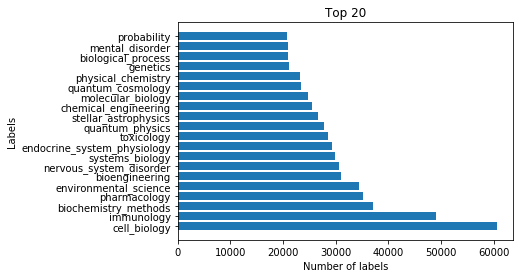

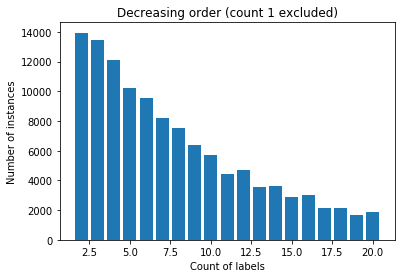

In [19]:
class_statistics(y, "omniscience")